<p align="center">
<img src='../../img/VerticaMLPython.png' width="180px">
</p>

# Vertica ML Python Exercise 12

During this exercice, we will:
<ul>
    <li> Build a Linear Regression model
    <li> Split the data
    <li> Evaluate the model with different metrics
    <li> Compute the model features importance
</ul>
## Initialization

Let's create a cursor using the vertica_cursor function.

In [1]:
from vertica_ml_python.utilities import vertica_cursor
cur = vertica_cursor("VerticaDSN")

During this study, we will work with the winequality dataset, already available in VERTICA ML PYTHON. 

In [2]:
from vertica_ml_python.learn.datasets import load_winequality
winequality = load_winequality(cur)

The purpose is to rate wines thanks to their composition.

## Regression

Let's explore the dataset by displaying descriptive statistics of all the columns.

In [3]:
winequality.describe()

,count,mean,std,min,25%,50%,75%,max,unique
alcohol,6497,10.4918008311529,1.192711748871,8.0,9.5,10.3,11.3,14.9,112
chlorides,6497,0.0560338617823611,0.0350336013724591,0.009,0.038,0.047,0.065,0.611,241
citric_acid,6497,0.318633215330153,0.145317864897591,0.0,0.25,0.31,0.39,1.66,89
density,6497,0.994696633831,0.00299867300371915,0.98711,0.99234,0.99489,0.99699,1.03898,1103
fixed_acidity,6497,7.21530706479914,1.29643375779982,3.8,6.4,7.0,7.7,15.9,106
free_sulfur_dioxide,6497,30.5253193781746,17.7493997720025,1.0,17.0,29.0,41.0,289.0,135
good,6497,0.19655225488687,0.397421408895367,0.0,0.0,0.0,0.0,1.0,2
pH,6497,3.21850084654456,0.160787202103987,2.72,3.11,3.21,3.32,4.01,108
quality,6497,5.81837771279051,0.873255271531123,3.0,5.0,6.0,6.0,9.0,7
residual_sugar,6497,5.44323533938742,4.75780374314741,0.6,1.8,3.0,8.1,65.8,316


<object>

<b>Question 1: </b>Split the dataset into a training and a testing.

In [4]:
from vertica_ml_python.learn.model_selection import train_test_split
train, test = train_test_split("winequality", cur)

<b>Question 2: </b>Create a Linear Regression model to rate the wines.

In [5]:
from vertica_ml_python.learn.linear_model import LinearRegression
from vertica_ml_python.utilities import drop_model

drop_model("linear_winequality", cur)
model = LinearRegression(name = "linear_winequality", cursor = cur)
model.fit(train, ["alcohol", "chlorides", "citric_acid", "density", "fixed_acidity", "free_sulfur_dioxide", "pH", "residual_sugar", "sulphates", "total_sulfur_dioxide", "volatile_acidity"], "quality", test)

The model linear_winequality was successfully dropped.




details
     predictor      |coefficient|std_err | t_value |p_value 
--------------------+-----------+--------+---------+--------
     Intercept      | 64.37917  |15.34351| 4.19586 | 0.00003
      alcohol       |  0.26020  | 0.02159|12.05077 | 0.00000
     chlorides      | -0.52430  | 0.40334|-1.29990 | 0.19371
    citric_acid     | -0.13753  | 0.09873|-1.39293 | 0.16371
      density       | -63.86943 |15.64629|-4.08208 | 0.00005
   fixed_acidity    |  0.08232  | 0.01970| 4.17808 | 0.00003
free_sulfur_dioxide |  0.00690  | 0.00094| 7.35331 | 0.00000
         ph         |  0.49161  | 0.11254| 4.36817 | 0.00001
   residual_sugar   |  0.04809  | 0.00644| 7.46467 | 0.00000
     sulphates      |  0.74842  | 0.09417| 7.94722 | 0.00000
total_sulfur_dioxide| -0.00268  | 0.00034|-7.85332 | 0.00000
  volatile_acidity  | -1.21489  | 0.09534|-12.74274| 0.00000


regularization
type| lambda 
----+--------
none| 1.00000


call_string
linear_reg('public.linear_winequality', 'vpython_train_test_spl

<b>Question 3: </b>Look at the model coef attribute and see what features you should eliminate if you decide to build another Linear Regression model. 

In [6]:
model.coef

,predictor,coefficient,std_err,t_value,p_value
0,Intercept,64.3791659407461,15.3435100118218,4.19585648206595,2.7735001981708e-05
1,alcohol,0.260195999656982,0.0215916497441285,12.0507697531421,6.51319664510253e-33
2,chlorides,-0.524298553394445,0.403338469043869,-1.29989721693871,0.193706167848557
3,citric_acid,-0.137526116614396,0.0987316651203362,-1.39292815984392,0.163713826574941
4,density,-63.8694283858422,15.6462893245892,-4.08208151216193,4.54481144657238e-05
5,fixed_acidity,0.082322223433505,0.0197033772561481,4.1780768019258,2.99844486056859e-05
6,free_sulfur_dioxide,0.00689685911897511,0.000937925219244617,7.3533145046784,2.30443446710562e-13
7,ph,0.491608360622681,0.112543296342059,4.36817097598163,1.28254684780457e-05
8,residual_sugar,0.0480899891599975,0.00644234781242949,7.46466824830779,1.00594072179275e-13
9,sulphates,0.748422574993064,0.0941741583577831,7.94721809086612,2.4197654135594e-15


<object>

<p style="color:red">The p-values of chlorides and citric_acid are really high, we can exclude them in a next similar model.</p>

<b>Question 4: </b>Look at the features importance and confirm the hypothesis.

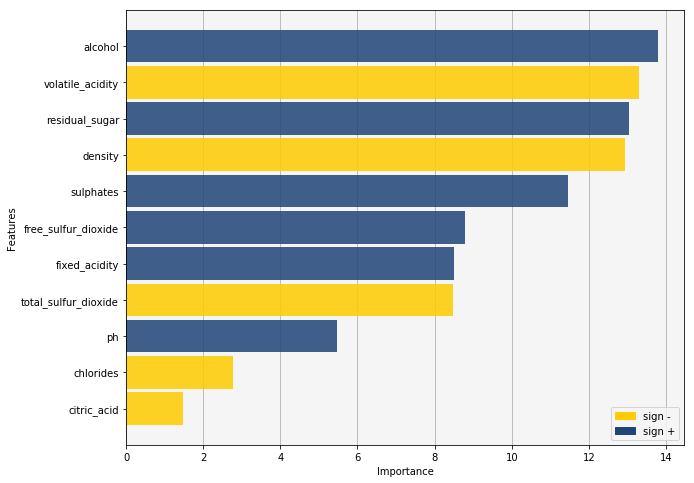

,importance
alcohol,13.78
volatile_acidity,13.29
residual_sugar,13.05
density,12.95
sulphates,11.46
free_sulfur_dioxide,8.78
fixed_acidity,8.5
total_sulfur_dioxide,8.47
ph,5.46
chlorides,2.76


<object>

In [7]:
%matplotlib inline
model.features_importance()

<b>Question 5: </b>Compute a regression report. What can you say about your model ? Which type of model you should probably consider to rate wines ?

In [8]:
model.regression_report()

,value
explained_variance,0.291241699052841
max_error,3.92862356633749
median_absolute_error,0.46809063434632
mean_absolute_error,0.574226384399297
mean_squared_error,0.549674682365059
r2,0.290224724177757


<object>

<p style="color:red">The model is not good enough. We probably need to consider a non-linear model.</p>